In [1]:
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import h5py

import databroker
from databroker import list_configs
from databroker import Broker

# make graphics inline
%matplotlib inline

In [2]:
print("databroker version: ", databroker.__version__)
print("configirations: ", list_configs())

databroker version:  0.9.3
configirations:  ['demo']


In [3]:
# select the demo configuration
db = Broker.named('demo')

In [4]:
# get the document header for the selected run
header = db[17554]

In [5]:
df = db.get_table(header, fill=False)
ic = np.array(df['sclr1_ch4'])
ic.shape

(10000,)

In [6]:
# get the metadata
start = header.start
descs = header.descriptors

start['detectors']

['zebra', 'sclr1', 'merlin1', 'xspress3']

In [7]:
# load the Event documents (without data)
datum_id = ''
for ev in header.events(fill=False):
    x  = ev['data']['dssx']
    y  = ev['data']['dssy']
    ic = ev['data']['sclr1_ch4']
    datum_id = ev['data']['merlin1']
    break
print("datum_id: ", datum_id)

datum_id:  f8748275-7443-42bf-898a-fe80780fd7aa


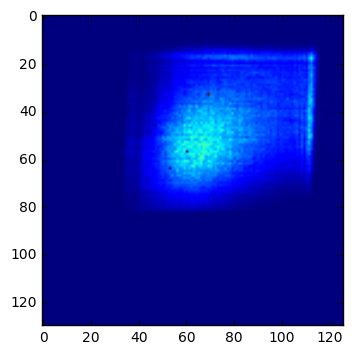

In [8]:
# load data based on the db api

from hxntools.handlers import register
register(db)

frames = []
for ev in header.events(fill=True):
    frame = ev['data']['merlin1']  
    frames.append(frame)
    break
frame = 1.*np.fliplr(np.squeeze(np.asarray(frames[0])).T)
plt.imshow(frame)